# **Checkpoint 01 - Modelagem de Dados e Aprendizagem de Máquina**

## **Objetivo**
Avaliar conceitos sobre Modelagem de dados e Aprendizado de Máquina (ML) adquiridos no curso.

## **Descrição do Desafio**
Você foi contratado por uma empresa que desenvolveu uma plataforma de compra e venda de carros usados. O funcionamento é bem simples, os usuários cadastram o carro que querem vender e esperam que outro usuário os compre, a empresa então fica com uma parte do valor de venda. Seu papel é desenvolver um modelo que possa determinar qual o melhor preço de venda para um usado.

Para nortear o desenvolvimento, você precisa de um ponto de partida e determinou uma pergunta chave: **Qual o preço de venda de um veículo Volkswagen Sedan 2.0 a gasolina, ano 2005, com cerca de 172095 km rodados?**

### **Orientações**
Para responder a essa pergunta, você deve utilizar o dataset da empresa, que está representado no arquivo **carros.csv**, e seguir o roteiro proposto neste desafio.

## **Exploração de Dados - 2 pontos**

1 - Carregue o dataset e faça a inspeção nas 15 primeiras linhas para identificação dos atributos. Quantos dados existem nesse dataset? Qual a quantidade de atributos? Existem valores faltantes? De que tipo são os dados? (1,0)

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/Jonatas1678/FIAP.IA/main/carros.csv"

df = pd.read_csv(url)

df.head(15)

,Brand,Price,Body,Mileage/1000,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.00,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,Golf IV


In [55]:
df.info()
#mostra o numero de dados e o numero de colunas
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage/1000  4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


(4345, 9)

2 - Note que os dataset está no sistema americano. Converta os dados para o sistema métrico e altere o cabeçalho de forma que os dados façam sentido. (1,0)

Obs: Os dados de Milhas dividos por mil, ou seja, multiplique o valor por 1.000 para ter o valor real!

In [56]:
df.columns
df['KM'] = df['Mileage/1000'] *1600
df = df.drop(columns=['Mileage/1000'])
df.rename(columns={'Brand':'Marca', 'Price':'Preço', 'Body': 'Tipo', 'EngineV':'Cilindrada', 'Engine Type':'Combustivel', 'Registration': 'Documentação', 'Year':'Ano', 'Model':'Modelo' })

,Marca,Preço,Tipo,Cilindrada,Combustivel,Documentação,Ano,Modelo,KM
0,BMW,4200.0,sedan,2.0,Petrol,yes,1991,320,443200
1,Mercedes-Benz,7900.0,van,2.9,Diesel,yes,1999,Sprinter 212,683200
2,Mercedes-Benz,13300.0,sedan,5.0,Gas,yes,2003,S 500,572800
3,Audi,23000.0,crossover,4.2,Petrol,yes,2007,Q7,384000
4,Toyota,18300.0,crossover,2.0,Petrol,yes,2011,Rav 4,192000
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,3.0,Diesel,yes,2014,S 350,14400
4341,BMW,6500.0,sedan,3.5,Petrol,yes,1999,535,1600
4342,BMW,8000.0,sedan,2.0,Petrol,yes,1985,520,310400
4343,Toyota,14200.0,sedan,NaN,Petrol,yes,2014,Corolla,49600


## **Analise descritiva dos dados - 2 pontos**

3 - Faça uma análise exploratória dos dados, utilizando gráficos e tabelas para realizar correlações entre os atributos e que permitam criar um cenário de correlação entre eles.

In [57]:
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns
dados=df.drop("KM", axis=1)
dados.head()

,Brand,Price,Body,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,2.0,Petrol,yes,2011,Rav 4


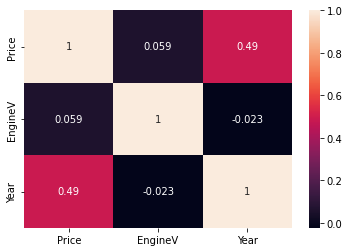

In [58]:
correlacao = dados.corr()
sns.heatmap(correlacao, annot=True )
plt.show()

## **Desenvolvimento do Modelo - 2 pontos**

4 - O conjunto de dados indica a aplicação de qual modelo de aprendizagem de máquina para responder a pergunta do desafio? Por quê? (1,0)

o modelo de aprendizagem e supervisionado onde e dado um conjunto de dados rotulados no qual a maquina pode medir sua precisao.Resposta:

5 - Qual a técnica sugerida para este projeto? Por quê? (1,0)

Resposta:Técnica de regressão, pois a resposta deve ser numérica

Com base nas suas respostas, agora escolha dois algortimos para implementar e comparar a performance de cada um deles ao final do desafio.

Resposta:

Algoritmo 1:Regressao Linear

Algoritmo 2: LinearSVR

## **Treinamento e teste do Modelo - 3 pontos**

6 - Crie um subset dos dados que serão utilizados para o treinamento e para o teste do modelo. Divida este subset em treino e teste. (1,0) 

In [59]:
dados = df.dropna(axis=0)
from sklearn.model_selection import train_test_split
len(dados)

4025

In [60]:
dados=df.drop(columns=['Registration', 'Engine Type', 'Model'], axis=0)
dados = pd.get_dummies(dados, drop_first=True)
x=dados.drop(columns=['Price'])
w = dados['Price']
dados.head()

,Price,EngineV,Year,KM,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van
0,4200.0,2.0,1991,443200,1,0,0,0,0,0,0,0,1,0,0
1,7900.0,2.9,1999,683200,0,1,0,0,0,0,0,0,0,0,1
2,13300.0,5.0,2003,572800,0,1,0,0,0,0,0,0,1,0,0
3,23000.0,4.2,2007,384000,0,0,0,0,0,0,0,0,0,0,0
4,18300.0,2.0,2011,192000,0,0,0,0,1,0,0,0,0,0,0


7 - Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

7.1 - Algoritmo 1: (0,5)


In [61]:
#Sua resposta aqui

7.2 - Algoritmo 2:  (0,5)

In [62]:
#Sua resposta aqui

7.3 - Qual dos algortimos obteve melhor resultado? Por quê? (1,0)

Resposta:

## **Modelo de Produção: Teste com novos dados - 1 ponto**

8 - Use o seu modelo treinado para responder a pergunta do desafio: